# **Import Needed Libraries**

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px


# Read Data and Get Some Information

In [19]:
data = pd.read_csv('c:/Users/singh/Downloads/netflix1.csv')

In [20]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [21]:
data.shape

(8790, 10)

In [22]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [23]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [24]:
(data.isnull()).sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [25]:
data.duplicated().sum()

0

In [26]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [27]:
data.dtypes


show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

# Exploratory Data Analysis (EDA)
  1. Content Type Distribution (Movies vs. TV Shows)

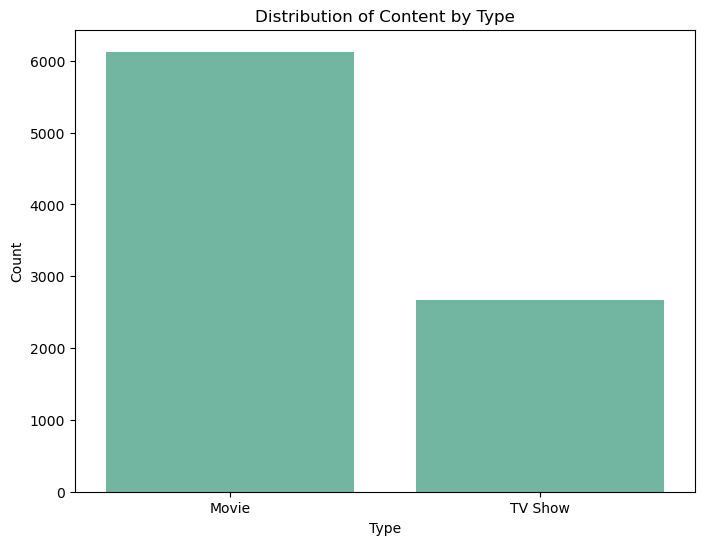

In [29]:
# Count the number of Movies and TV Shows

type_counts = data['type'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x = type_counts.index, y = type_counts.values, hue=300, legend=False, palette = 'Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [30]:
# Most Common Genres

data['genres']=(data['listed_in']).apply(lambda x:x.split(','))
all_genres= (data['genres']).sum()
genre_counts = pd.Series(all_genres).value_counts().head(10)
genre_counts

 International Movies     2624
Dramas                    1599
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     773
 Independent Movies        736
 TV Dramas                 695
 Romantic Movies           613
Name: count, dtype: int64

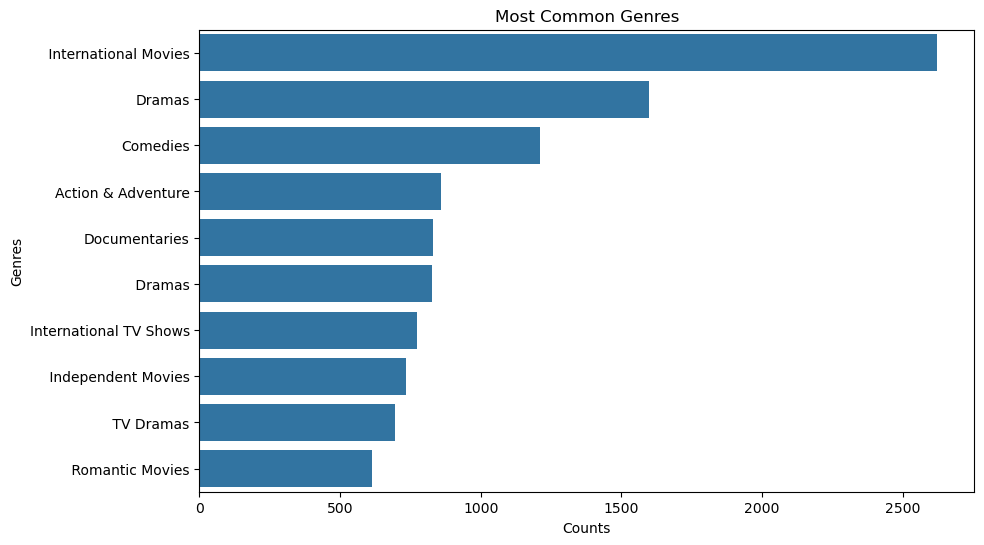

In [31]:
# Plot the most common genres

plt.figure(figsize=(10,6))
sns.barplot(x = genre_counts.values, y = genre_counts.index)
plt.title('Most Common Genres')
plt.xlabel('Counts')
plt.ylabel('Genres')
plt.show()

#  Top 10 Directors with the Most Titles

In [33]:
top_directors = data['director']. value_counts().head(11)
colors = ["#8c0404","#f25ed0","#000000","#16A085","#34495E",
           "#21618C ","#512E5F","#45B39D","#AAB7B8 ","#20B2AA",
           "#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6"]

px.bar( x = top_directors.values[1:11] , y = top_directors.index[1:11],
       text_auto=True, labels = dict(x='Number of movies', y='Directors'), title='Number of Movies by Directors'
      ,  color = top_directors[1:11].index,,width=800, height=600)


SyntaxError: invalid syntax (2564409391.py, line 8)

# Content Added Over Time

In [ ]:
data['Year_added']=data['date_added'].dt.year
data['Month_added']=data['date_added'].dt.month

plt.figure(figsize=(10,6))
sns.countplot(x='Year_added', data=data)
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Word Cloud of Movie Titles

In [ ]:

movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Content distribution on Netflix.

type_counts = data['type'].value_counts()
plt.figure(figsize=(8,6))
plt.pie( x= type_counts, labels=['Movies', 'TV Shows'],autopct='%1.1f%%', explode=[0,0.1])
plt.title('Distribution of Content by Type')
plt.show()

# Visual representation of rating frequency of movies and TV Shows on Netflix.

In [ ]:
rating_count = data['rating'].value_counts().reset_index()
rating_count

In [ ]:

plt.figure(figsize=(10,6))
plt.pie( rating_count['count'][:8],labels=rating_count['rating'][:8], autopct='%0.f%%')
plt.title("Rating on Netflix")
plt.show()

In [ ]:
# Converting date_added column to datetime.

data['date_added'] = pd.to_datetime(data['date_added'])
data.describe()

In [ ]:
data['country'].value_counts()

In [ ]:
# Top 10 countries with most content on Netflix
top_10_countries = data['country'].value_counts().reset_index()[:10]

plt.figure(figsize=(10,6))
plt.bar(top_10_countries['country'], top_10_countries['count'])
plt.xticks(rotation=45)
plt.title('Top 10 countries with most content on Netflix')
plt.xlabel('country')
plt.ylabel('content')
plt.show()

In [ ]:
# Monthly releases of Movies and TV shows on Netflix

data['month'] = data['date_added'].dt.month
monthly_movies = data[data['type']=='Movie']['month'].value_counts().sort_index()
monthly_TV_shows = data[data['type']=='TV Show']['month'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.plot(monthly_movies.index, monthly_movies.values, label='Movies', marker='o')
plt.plot(monthly_TV_shows.index, monthly_TV_shows.values, label='TV Show', marker='o')
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Monthly releases of Movies and TV shows on Netflix')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Yearly releases of Movies and TV Shows on Netflix

data['year']=data['date_added'].dt.year
yearly_movies= data[data['type']=='Movie']['year'].value_counts().sort_index()
yearly_TV_Show= data[data['type']=='TV Show']['year'].value_counts().sort_index()
plt.plot(yearly_movies.index, yearly_movies.values, label='Movies', marker='o')
plt.plot(yearly_TV_Show.index, yearly_TV_Show.values, label='TV Shows', marker='o')
plt.legend()
plt.grid(True)
plt.title("Yearly releases of Movies and TV Shows on Netflix")
plt.show()


In [ ]:
# Top 10 popular movie genres

top_movie_genres = data[data['type']=='Movie'].groupby('listed_in').size().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,8))
sns.barplot(x=top_movie_genres.index, y=top_movie_genres.values)
plt.title('Top 10 popular movie genres')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genres')
plt.ylabel('Movies')
plt.show()

In [ ]:
# Top 10 TV Shows genres

top_TV_Shows = data[data['type']=='TV Show'].groupby('listed_in').size().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,8))
sns.barplot(x=top_TV_Shows.index, y=top_TV_Shows.values)
plt.title('Top 10 popular TV Shows ')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genres')
plt.ylabel('TV Shows')
plt.show()